# Classifying newswires: A multiclass classification

## Using Densly Connected Neural Network

- multilabel multiclass classification

### Dataset

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
import numpy as np

np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [ (value,key) for (key,value) in word_index.items()]
)

decode_newswire = " ".join(
    [reverse_word_index.get(i - 3, '?')  for i in train_data[0]]
)

In [8]:
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[54]

4

In [10]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Build Our Model

In [15]:
from tensorflow import keras
from keras import layers

In [16]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax'),
])

In [17]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
x_val = x_train[:1000]
partial_x_train  =x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [19]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 2.4752 - accuracy: 0.5381 - val_loss: 1.6685 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3553 - accuracy: 0.7156 - val_loss: 1.2716 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0193 - accuracy: 0.7870 - val_loss: 1.1147 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8044 - accuracy: 0.8321 - val_loss: 1.0372 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6466 - accuracy: 0.8648 - val_loss: 0.9735 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5163 - accuracy: 0.8924 - val_loss: 0.9219 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4159 - accuracy: 0.9133 - val_loss: 0.8919 - val_accuracy: 0.8140
Epoch 8/20
16

In [20]:
import matplotlib.pyplot as plt

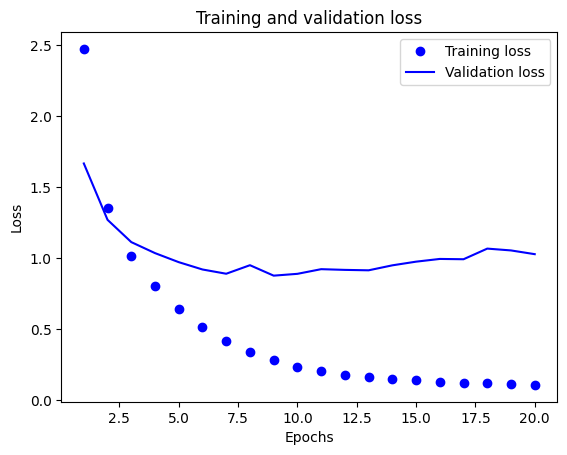

In [21]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

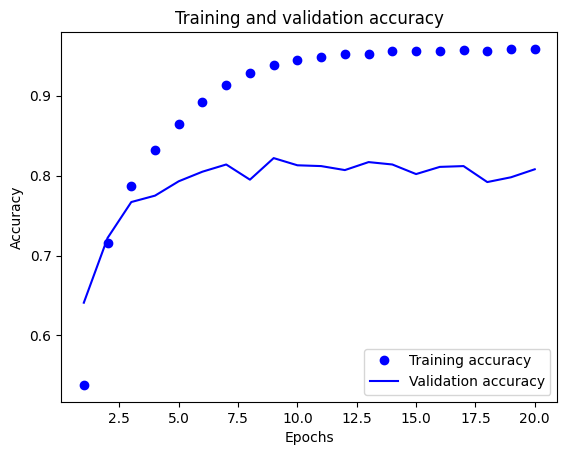

In [22]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46,activation='softmax'),
])


model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.6675 - accuracy: 0.4982 - val_loss: 1.7530 - val_accuracy: 0.6160
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4277 - accuracy: 0.7065 - val_loss: 1.3154 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0754 - accuracy: 0.7749 - val_loss: 1.1546 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8601 - accuracy: 0.8168 - val_loss: 1.0697 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6966 - accuracy: 0.8498 - val_loss: 0.9866 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5633 - accuracy: 0.8835 - val_loss: 0.9410 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4517 - accuracy: 0.9064 - val_loss: 0.9143 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

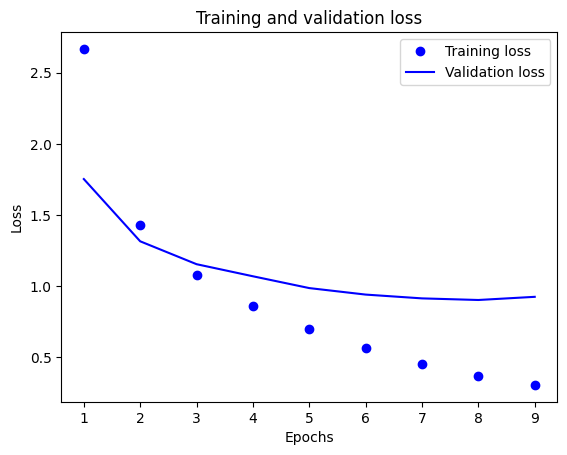

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

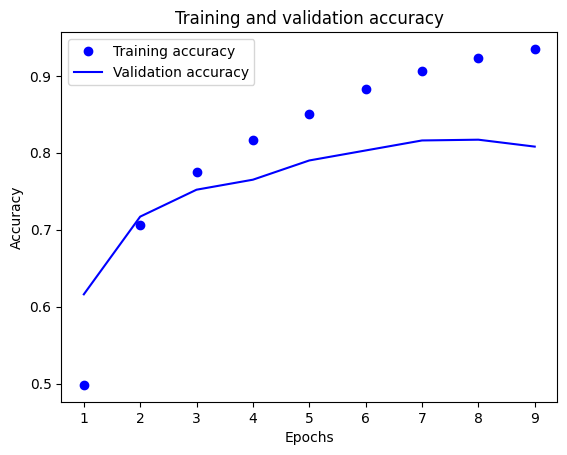

In [25]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
results = model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0065 - accuracy: 0.7818


In [27]:
import copy

In [28]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_Array = np.array(test_labels) == np.array(test_labels_copy)
hits_Array.mean()

0.1834372217275156

In [29]:
predictions = model.predict(x_test)
predictions

71/71 [==============================] - 0s 3ms/step


array([[8.17728233e-06, 3.36367048e-05, 2.74938679e-06, ...,
        6.35012555e-07, 1.86606383e-06, 1.17216132e-06],
       [2.47870702e-02, 2.37937551e-02, 1.31956544e-02, ...,
        1.33585971e-04, 1.23393465e-05, 6.76488999e-05],
       [7.20699131e-03, 8.35796118e-01, 5.41243702e-03, ...,
        4.76248766e-04, 4.30177985e-04, 6.35915028e-04],
       ...,
       [1.66368281e-05, 5.35650579e-05, 1.69289669e-05, ...,
        6.72111719e-06, 1.23692198e-05, 3.41227569e-05],
       [1.49723922e-03, 1.21895485e-02, 3.18111572e-03, ...,
        1.51067317e-04, 1.52427657e-03, 3.85950669e-04],
       [1.03946670e-03, 3.31771106e-01, 4.26433682e-02, ...,
        8.60603235e-04, 4.05087136e-04, 1.56579597e-03]], dtype=float32)

In [30]:
np.argmax(predictions[0])

3

In [31]:
test_labels[0]

3

In [32]:
predictions.shape

(2246, 46)

In [33]:
np.sum(predictions[0])

1.0

- If you’re trying to classify data points among N classes, your model should end with a Dense layer of size N.
- In a single-label, multiclass classification problem, your model should end with a softmax activation so that it will output a probability distribution over the N output classes
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets
- There are two ways to handle labels in multiclass classification
    - Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    - Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.